In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [298]:

df = pd.read_csv("Employee_Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [299]:
# DATA PREPROCESSING AND CLEANING

df.info()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [300]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [301]:
df.duplicated().sum()

np.int64(0)

In [302]:
df.drop_duplicates(inplace=True)


In [303]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [305]:
drop_columns=['employeecount','standardhours','over18', 'dailyrate', 'hourlyrate', 'monthlyrate' ]
df.drop(drop_columns,axis=1,inplace=True)

In [306]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [307]:
df.shape

(1470, 29)

In [308]:
df['attrition'] = df['attrition'].map({'No': 0, 'Yes': 1})

# No - 0 (employee stayed)
# Yes - 1 (employee Left)

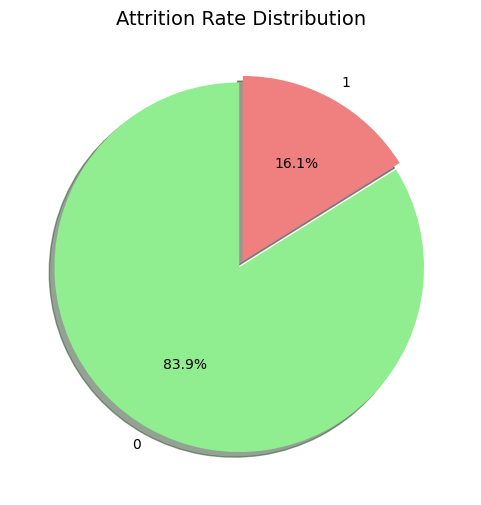

In [309]:
import matplotlib.pyplot as plt

# Calculate attrition rate
attrition_rate = df['attrition'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_rate, 
        labels=attrition_rate.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightgreen', 'lightcoral'],
        explode=(0.02, 0.02),
        shadow=True)

plt.title('Attrition Rate Distribution', fontsize=14)
plt.show()

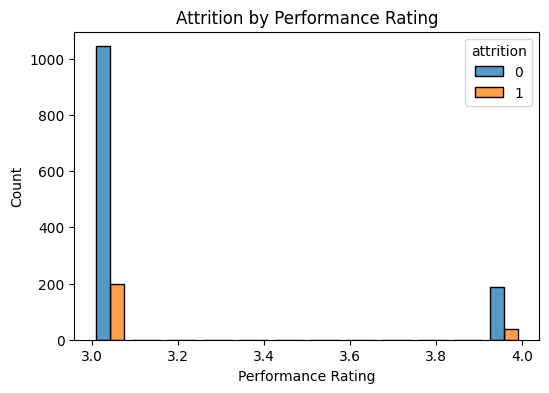

In [310]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='performancerating', hue='attrition', multiple='dodge', shrink=0.8)
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()

In [311]:
# At both ratings (3.0 and 4.0), the majority of employees did not leave.
# The attrition counts are higher for rating 3.0 primarily because 
# more employees have that rating—not necessarily because of their performance.

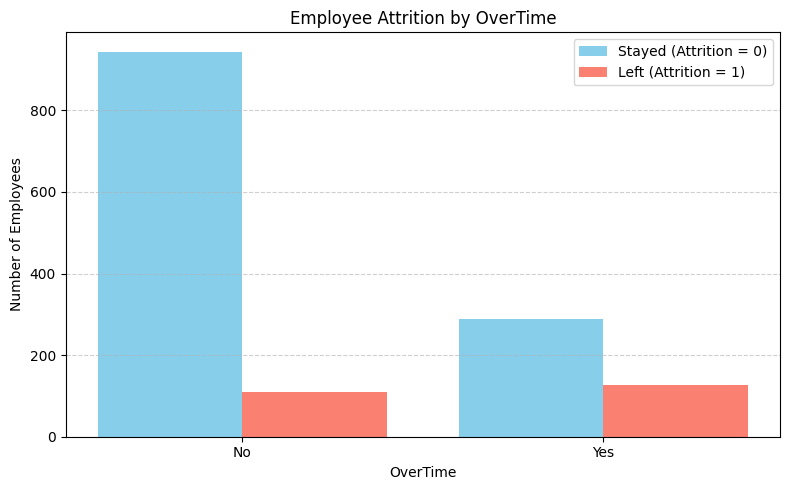

In [312]:
import matplotlib.pyplot as plt
import pandas as pd

# Cross-tab of OverTime vs Attrition
attrition_overtime = pd.crosstab(df['overtime'], df['attrition'])  # 0 = Stayed, 1 = Left

# Get labels and values
labels = attrition_overtime.index  # 'No', 'Yes' (for Overtime)
no_attrition = attrition_overtime[0]  # Stayed
yes_attrition = attrition_overtime[1]  # Left
x = range(len(labels))  # numeric positions

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x, no_attrition, width=0.4, label='Stayed (Attrition = 0)', color='skyblue')
plt.bar([p + 0.4 for p in x], yes_attrition, width=0.4, label='Left (Attrition = 1)', color='salmon')

# X-axis labels and formatting
plt.xticks([p + 0.2 for p in x], labels)
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.title('Employee Attrition by OverTime')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [313]:
# Employees not working overtime (No OverTime = 0):
          # A large majority stayed (very tall blue bar).
          # A relatively small number left (short red bar).
# Employees working overtime (OverTime = 1):
          # Fewer employees overall.
          # A higher proportion of them left compared to those who stayed.
# This means that working overtime may lead to poor work-life balance, 
# which could be a reason why more employees choose to leave the company.

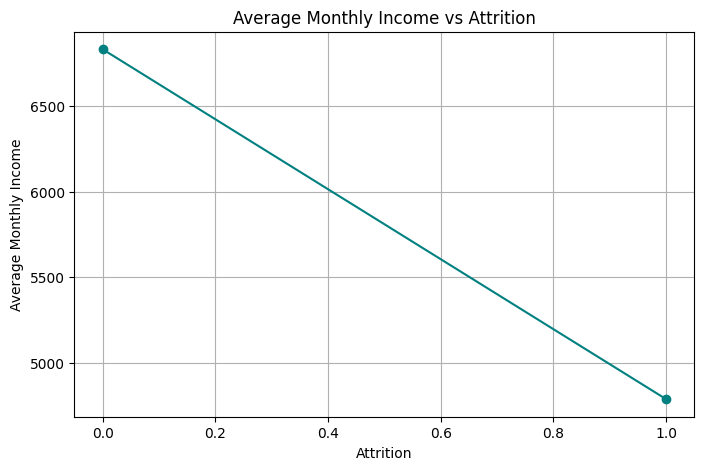

In [314]:
import matplotlib.pyplot as plt

# Compute the average monthly income for each attrition group
avg_income = df.groupby('attrition')['monthlyincome'].mean()

# Plot using a line plot
plt.figure(figsize=(8, 5))
plt.plot(avg_income.index, avg_income.values, marker='o', linestyle='-', color='teal')
plt.title('Average Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Monthly Income')
plt.grid(True)
plt.show()


In [315]:
# Employees who did not leave the company (Attrition = No) have a significantly higher average monthly income (around ₹6,700).
# Employees who left the company (Attrition = Yes) have a lower average monthly income (around ₹4,700).
# There’s a negative relationship between monthly income and attrition.
# As average income decreases, the likelihood of attrition appears to increase.
# This suggests that lower-paid employees may be more likely to leave the company 
#  — potentially due to dissatisfaction, better opportunities

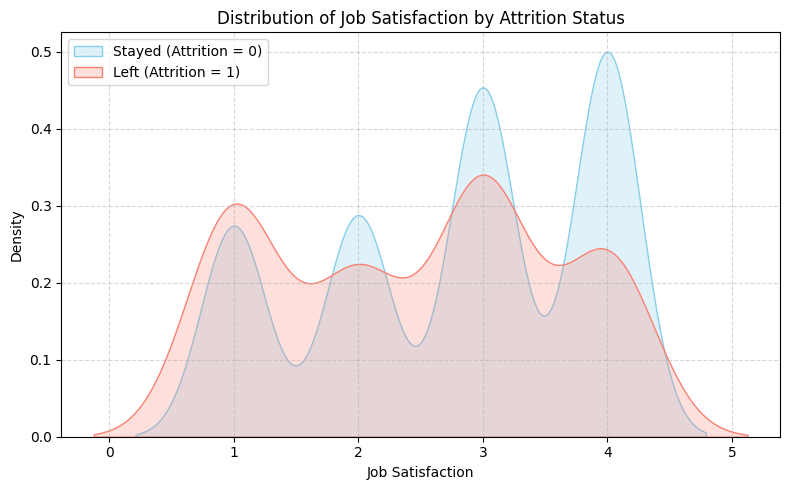

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# KDE plot grouped by attrition status
sns.kdeplot(data=df[df['attrition'] == 0], x='jobsatisfaction', fill=True, label='Stayed (Attrition = 0)', color='skyblue')
sns.kdeplot(data=df[df['attrition'] == 1], x='jobsatisfaction', fill=True, label='Left (Attrition = 1)', color='salmon')

# Formatting
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.title('Distribution of Job Satisfaction by Attrition Status')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [317]:
# Employees who stayed tend to report higher job satisfaction.
# There is a strong presence of stayers around scores 3 and 4.

# More red in lower satisfaction scores (1 and 2):
# Employees who left were more concentrated in lower satisfaction levels.

# Job satisfaction appears to be a good predictor of attrition.

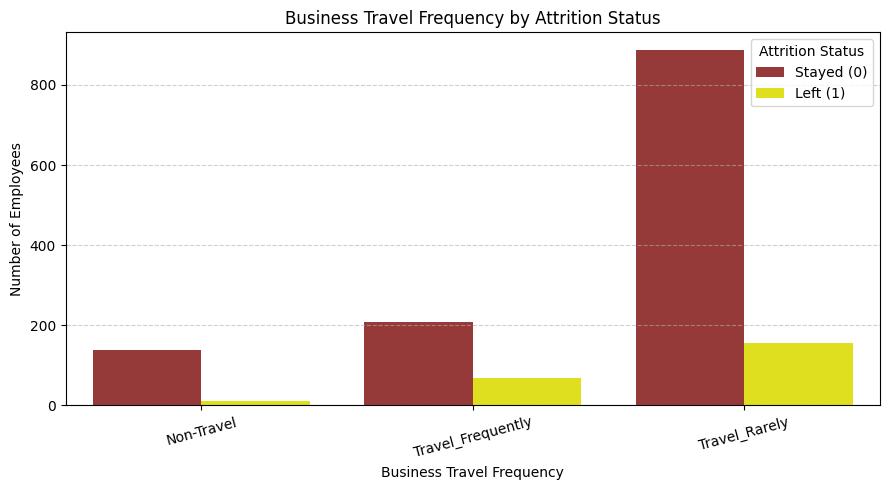

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a grouped count (cross-tab)
travel_attrition = pd.crosstab(df['businesstravel'], df['attrition'])

# Reset index for plotting
travel_attrition = travel_attrition.reset_index()
travel_attrition.columns = ['businesstravel', 'Stayed (0)', 'Left (1)']

# Melt for seaborn-friendly format
melted = travel_attrition.melt(id_vars='businesstravel', 
                               value_vars=['Stayed (0)', 'Left (1)'],
                               var_name='Attrition Status', 
                               value_name='Count')

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=melted, x='businesstravel', y='Count', hue='Attrition Status', palette=['brown', 'yellow'])

# Formatting
plt.title('Business Travel Frequency by Attrition Status')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Number of Employees')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [319]:
# Employees who travel frequently are the most likely to leave the company.
# Those who don’t travel at all are the least likely to leave.
# Travel_Rarely has a moderate attrition rate.

In [320]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [321]:
df['department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [322]:
df['businesstravel'].unique()            

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [323]:
df['educationfield'].unique()            

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [324]:
df['gender'].unique() 

array(['Female', 'Male'], dtype=object)

In [325]:
df['jobrole'].unique() 

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [326]:
df['maritalstatus'].unique() 

array(['Single', 'Married', 'Divorced'], dtype=object)

In [327]:
df['overtime'].unique() 

array(['Yes', 'No'], dtype=object)

In [328]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [329]:
# Department
df['department'] = df['department'].map({
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
})

# BusinessTravel
df['businesstravel'] = df['businesstravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})

# EducationField
df['educationfield'] = df['educationfield'].map({
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree': 3,
    'Human Resources': 4,
    'Other': 5
})

# Gender
df['gender'] = df['gender'].map({
    'Male': 0,
    'Female': 1
})

# JobRole
df['jobrole'] = df['jobrole'].map({
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
})

# MaritalStatus
df['maritalstatus'] = df['maritalstatus'].map({
    'Single': 0,
    'Married': 1,
    'Divorced': 2
})

# OverTime
df['overtime'] = df['overtime'].map({
    'No': 0,
    'Yes': 1
})


In [330]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,1,0,1,2,0,1,2,1,3,2,0,4,0,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,1,8,1,0,2,3,0,2,2,1,2,1,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1,2,2,5,4,4,0,2,1,2,3,0,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1,3,4,0,5,4,1,3,1,1,3,1,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,1,2,1,1,7,1,0,3,1,2,2,1,3468,9,0,12,3,4,1,6,3,3,2,2,2,2


In [331]:
print(df['maritalstatus'].unique()) 
print(df['jobrole'].unique()) 
print(df['gender'].unique()) 
print(df['department'].unique()) 
print(df['businesstravel'].unique()) 

[0 1 2]
[0 1 2 3 4 5 6 7 8]
[1 0]
[0 1 2]
[1 2 0]


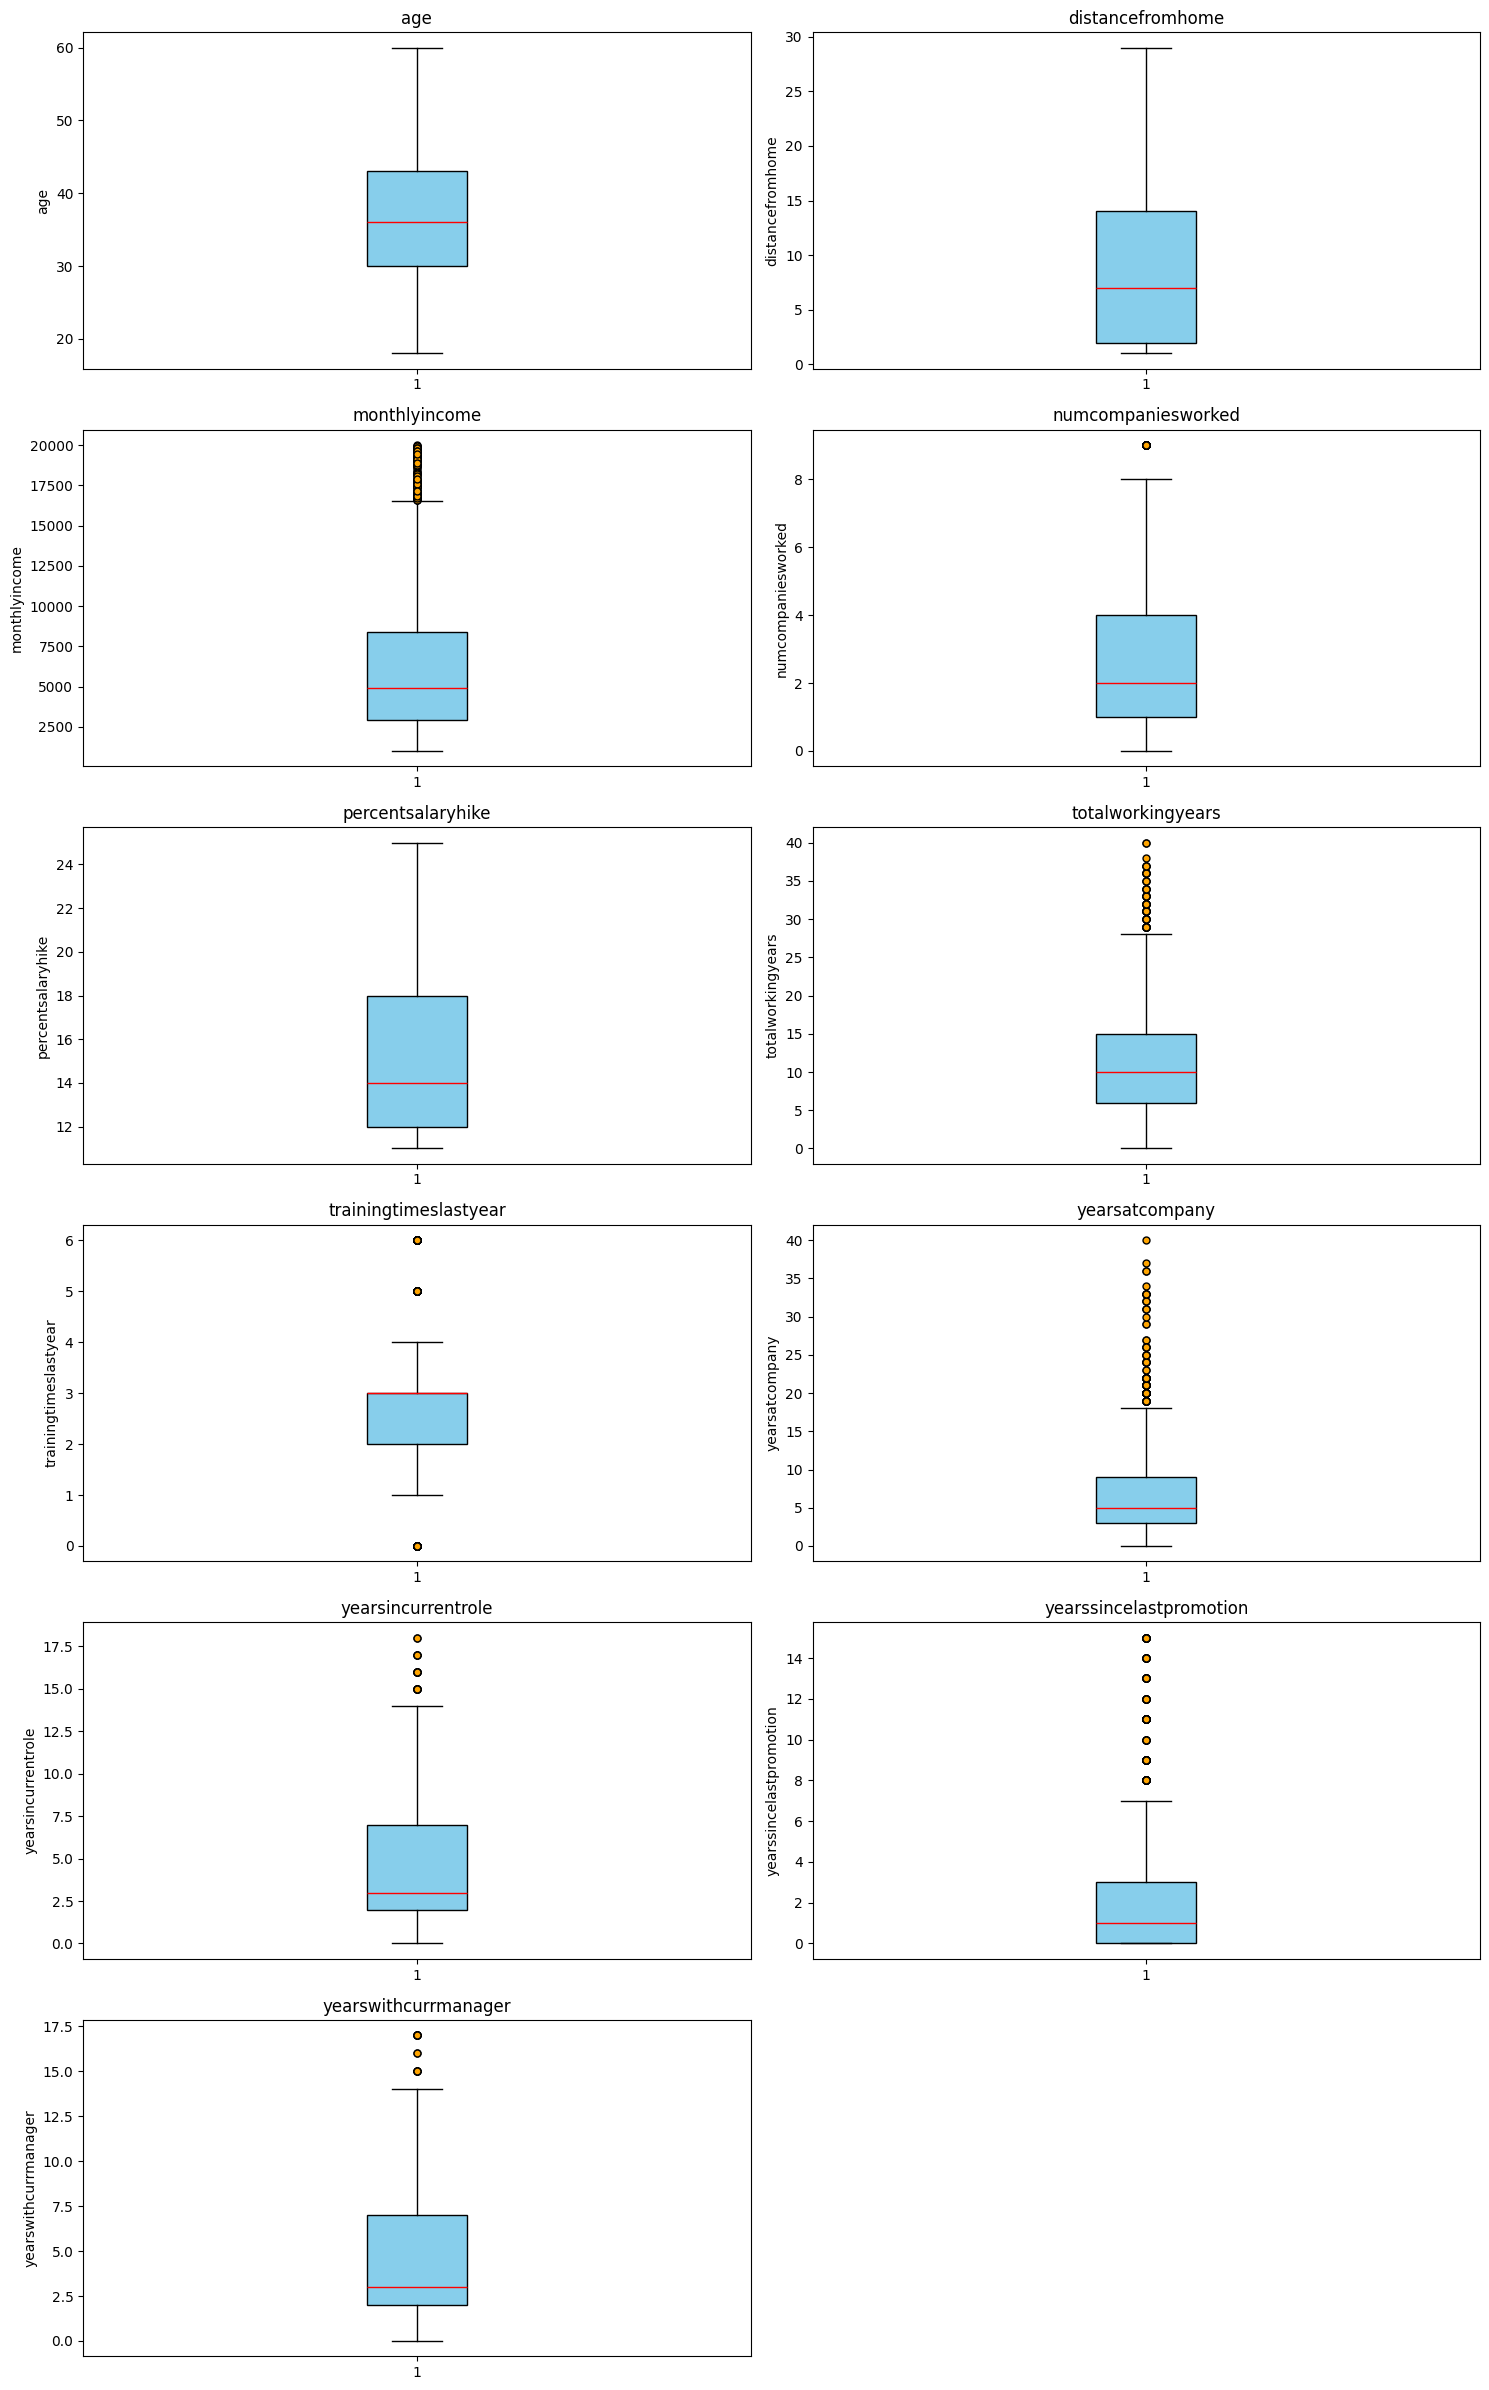

In [332]:
import matplotlib.pyplot as plt

# Define numerical columns for outlier detection
outlier_columns = [
    'age', 'distancefromhome', 'monthlyincome', 'numcompaniesworked',
    'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear',
    'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
    'yearswithcurrmanager'
]

# Number of plots per row
plots_per_row = 2
total_plots = len(outlier_columns)
rows = (total_plots + plots_per_row - 1) // plots_per_row

# Set figure size
plt.figure(figsize=(15, rows * 4))

# Plot boxplots
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, plots_per_row, i)
    plt.boxplot(df[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()



In [333]:
import pandas as pd

# List of features with high outliers based on your analysis
features_to_cap = [
    'monthlyincome',
    'numcompaniesworked',
    'totalworkingyears',
    'trainingtimeslastyear',
    'yearsatcompany',
    'yearsincurrentrole',
    'yearssincelastpromotion',
    'yearswithcurrmanager'
]

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping only to specified features
for feature in features_to_cap:
    if feature in df.columns:
        print(f"Capping outliers in: {feature}")
        df = cap_outliers_iqr(df, feature)
    else:
        print(f"Feature '{feature}' not found in DataFrame.")

# Now df has capped outliers only for selected features


Capping outliers in: monthlyincome
Capping outliers in: numcompaniesworked
Capping outliers in: totalworkingyears
Capping outliers in: trainingtimeslastyear
Capping outliers in: yearsatcompany
Capping outliers in: yearsincurrentrole
Capping outliers in: yearssincelastpromotion
Capping outliers in: yearswithcurrmanager


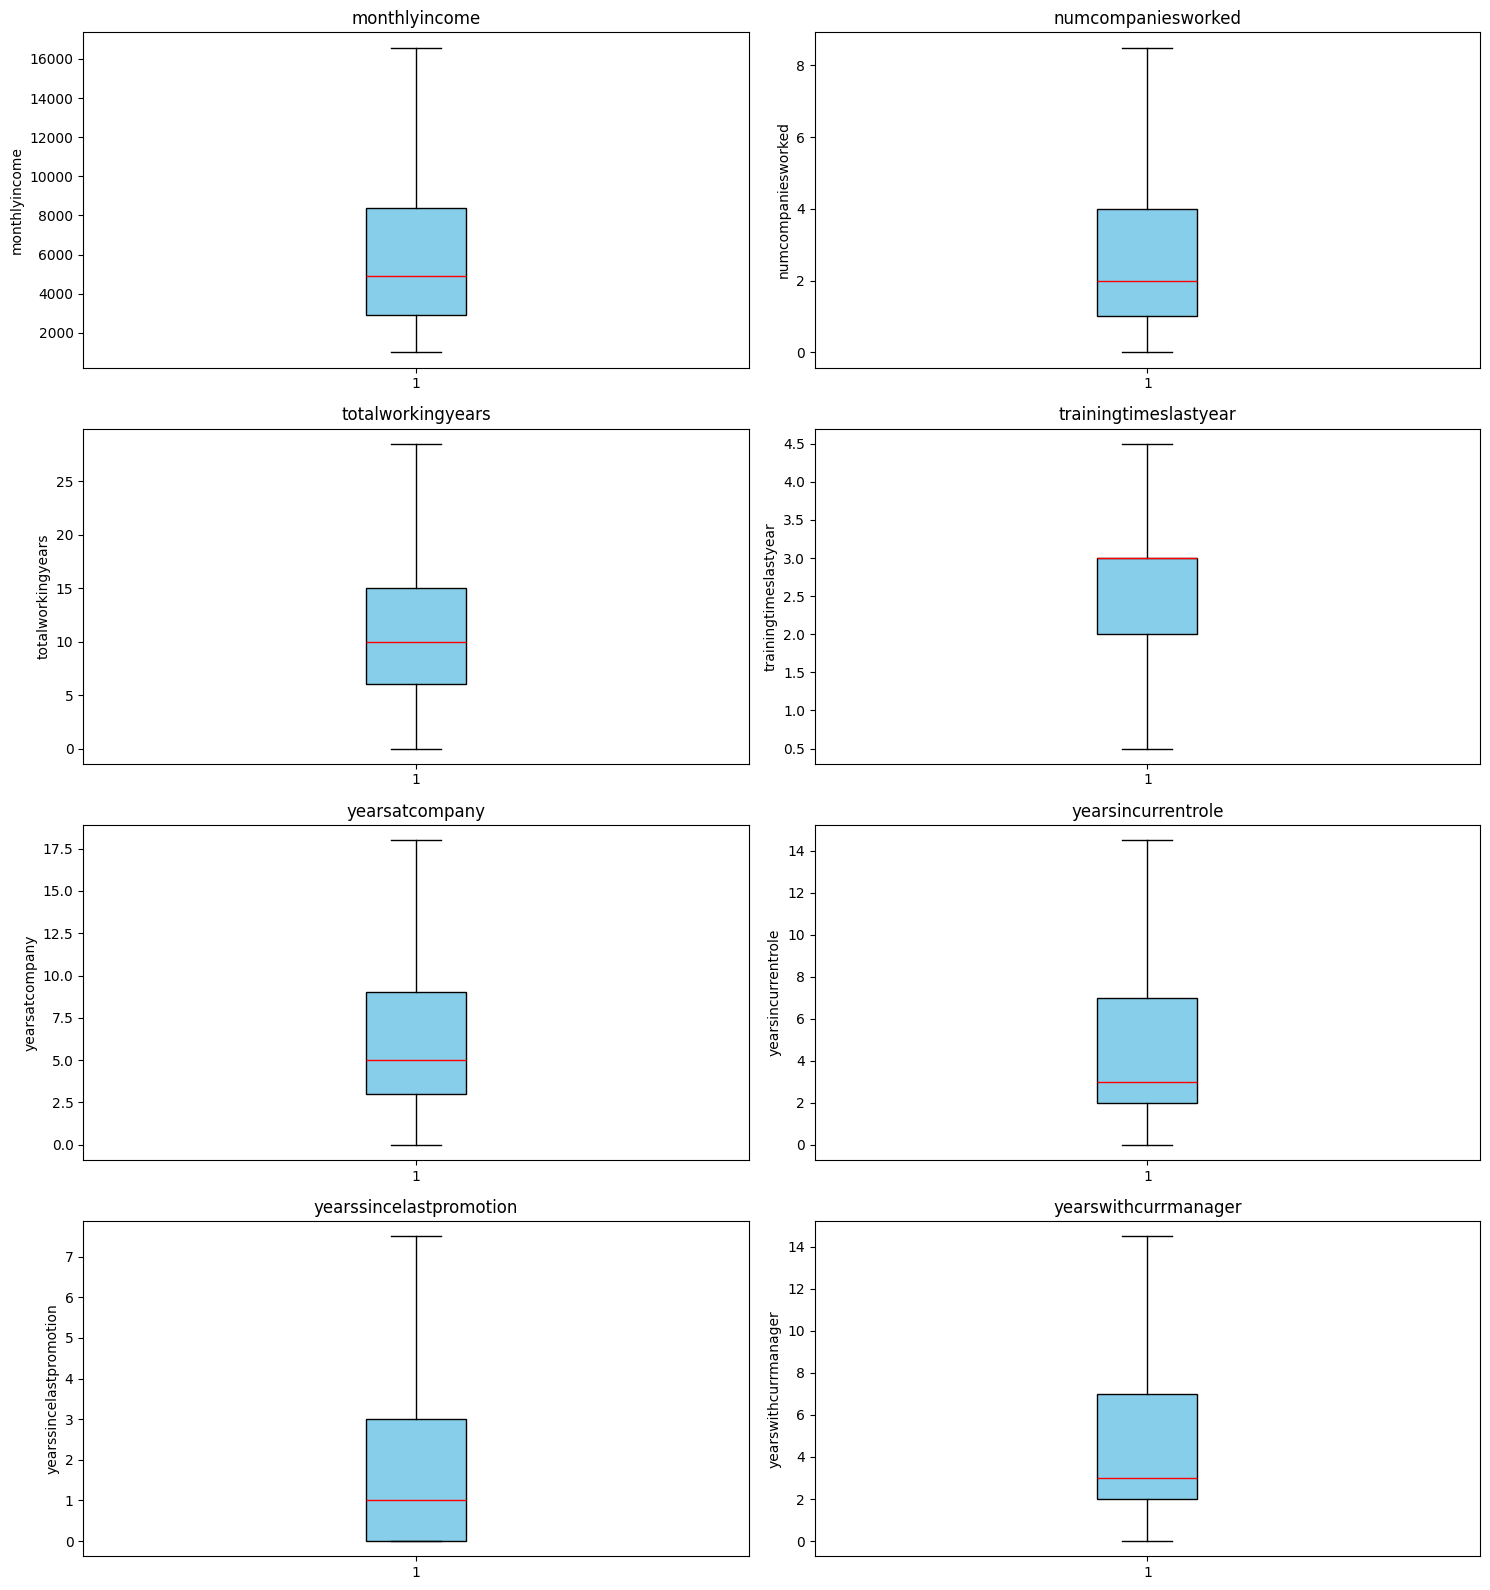

In [334]:
import matplotlib.pyplot as plt

# Define numerical columns for outlier detection
outlier_columns = [
    'monthlyincome', 'numcompaniesworked','totalworkingyears', 'trainingtimeslastyear',
    'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'
]

# Number of plots per row
plots_per_row = 2
total_plots = len(outlier_columns)
rows = (total_plots + plots_per_row - 1) // plots_per_row

# Set figure size
plt.figure(figsize=(15, rows * 4))

# Plot boxplots
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, plots_per_row, i)
    plt.boxplot(df[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()



In [335]:
pd.set_option('display.max_columns', None)
df.head(15)

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,1,0,1,2,0,1,2,1,3,2,0,4,0,5993,8.0,1,11,3,1,0,8.0,0.5,1,6,4.0,0.0,5.0
1,49,0,2,1,8,1,0,2,3,0,2,2,1,2,1,5130,1.0,0,23,4,4,1,10.0,3.0,3,10,7.0,1.0,7.0
2,37,1,1,1,2,2,5,4,4,0,2,1,2,3,0,2090,6.0,1,15,3,2,0,7.0,3.0,3,0,0.0,0.0,0.0
3,33,0,2,1,3,4,0,5,4,1,3,1,1,3,1,2909,1.0,1,11,3,3,0,8.0,3.0,3,8,7.0,3.0,0.0
4,27,0,1,1,2,1,1,7,1,0,3,1,2,2,1,3468,8.5,0,12,3,4,1,6.0,3.0,3,2,2.0,2.0,2.0
5,32,0,2,1,2,2,0,8,4,0,3,1,2,4,0,3068,0.0,0,13,3,3,0,8.0,2.0,2,7,7.0,3.0,6.0
6,59,0,1,1,3,3,1,10,3,1,4,1,2,1,1,2670,4.0,1,20,4,1,3,12.0,3.0,2,1,0.0,0.0,0.0
7,30,0,1,1,24,1,0,11,4,0,3,1,2,3,2,2693,1.0,0,22,4,2,1,1.0,2.0,3,1,0.0,0.0,0.0
8,38,0,2,1,23,3,0,12,4,0,2,3,3,3,0,9526,0.0,0,21,4,2,0,10.0,2.0,3,9,7.0,1.0,8.0
9,36,0,1,1,27,3,1,13,3,0,3,2,4,3,1,5237,6.0,0,13,3,2,2,17.0,3.0,2,7,7.0,7.0,7.0


In [336]:
print(df['attrition'].value_counts())

attrition
0    1233
1     237
Name: count, dtype: int64


In [337]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Define your numerical columns
numeric_cols = ['age', 'distancefromhome', 'monthlyincome', 'numcompaniesworked', 'percentsalaryhike',
                'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
                'yearssincelastpromotion', 'yearswithcurrmanager']

# Step 2: Apply StandardScaler to the full DataFrame
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [338]:
# Separate features (X) and target (y)
x = df.drop('attrition', axis=1)
y = df['attrition']

In [339]:
print("Original class distribution:\n", y.value_counts())

Original class distribution:
 attrition
0    1233
1     237
Name: count, dtype: int64


In [340]:
# Apply SMOTE on entire dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [341]:
# Convert back to DataFrame/Series with correct columns
x_resampled = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled = pd.Series(y_resampled, name='Attrition')

In [342]:
print("Shape of X before SMOTE:", x.shape)
print("Shape of X after SMOTE :", x_resampled.shape)

print("Shape of y before SMOTE:", y.shape)
print("Shape of y after SMOTE :", y_resampled.shape)


Shape of X before SMOTE: (1470, 28)
Shape of X after SMOTE : (2466, 28)
Shape of y before SMOTE: (1470,)
Shape of y after SMOTE : (2466,)


In [343]:
from sklearn.model_selection import train_test_split

# Split resampled data into training and testing sets (80% train, 20% test)
# Stratify - when you split into train/test, you still want to maintain the same ratio of classes (e.g., 50% No / 50% Yes in Attrition) in both splits.
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Check class distribution after split
print("Train target distribution:\n", y_train.value_counts())
print("\nTest target distribution:\n", y_test.value_counts())

Train target distribution:
 Attrition
1    986
0    986
Name: count, dtype: int64

Test target distribution:
 Attrition
1    247
0    247
Name: count, dtype: int64


In [344]:
print("Train feature distribution:\n", x_train.shape)
print("\nTest feature distribution:\n", x_test.shape) 

Train feature distribution:
 (1972, 28)

Test feature distribution:
 (494, 28)


In [345]:
combined_df = x_resampled.copy()
combined_df['Attrition'] = y_resampled
combined_df.to_csv('resampled_with_target.csv', index=False)

In [346]:
# Variable	        Description
#  x	              Original scaled features
#  y	              Original target (imbalanced)
#  x_resampled	      Scaled + SMOTE-balanced features (full set)
#  y_resampled	      Balanced target labels after SMOTE
#  x_train, x_test	  Train/test features from x_resampled
#  y_train, y_test	  Train/test targets from y_resampled

In [347]:
# Apply StandardScaler
#numeric_cols = ['age', 'distancefromhome', 'monthlyincome', 'numcompaniesworked', 'percentsalaryhike','totalworkingyears',
                #'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 
                #'yearswithcurrmanager']

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

# Fit on training data, transform both train and test
#Fits the scaler on the training data: calculates the mean and standard deviation of each column in X_train (Feature).

#X_train.loc[:, numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
#X_test.loc[:, numeric_cols] = scaler.transform(X_test[numeric_cols])

# Fit the scaler on training data and transform both train and test sets
#X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
#X_test_scaled = scaler.transform(X_test[numeric_cols])

# Assign scaled values back with appropriate casting
#X_train[numeric_cols] = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index).astype('float64')
#X_test[numeric_cols] = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index).astype('float64')

In [348]:
#import pickle
# Save the scaler for use in Streamlit
#with open('scaler.pkl', 'wb') as f:
#    pickle.dump(scaler, f)


In [349]:
#print("\nAfter Scaling:")
#print(X_train[numeric_cols].head())

In [350]:
#print(X_train.head())
#print(X_train.shape)

In [351]:
#print(X_test.head())
#print(X_test.shape)

In [352]:
#pd.set_option('display.max_columns', None)
#X_test.head(15)

In [353]:
# Combine X_test and y_test
#test_scaled = X_test.copy()
#test_scaled['attrition'] = y_test

# Save as CSV
#test_scaled.to_csv('test_scaled.csv', index=False)


In [354]:
#from imblearn.over_sampling import SMOTE

# Initialize SMOTE (you can tune the 'random_state' for reproducibility)
#smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
#print("Before SMOTE:", y_train.value_counts())
#print("After SMOTE:", y_train_smote.value_counts())

In [355]:
#print(X_train_smote.shape)
#print(y_train_smote.shape)

In [356]:
#from sklearn.linear_model import LogisticRegressionsss
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.model_selection import cross_val_score

In [357]:
# Initialize the Logistic Regression model
#lr_model = LogisticRegression(random_state=42, max_iter=3000)

In [358]:
# Train the model on the SMOTE-resampled training data
#lr_model.fit(X_train_smote, y_train_smote)

In [359]:
# Predict on the original test set (unseen data)
#y_pred = lr_model.predict(X_test)

In [360]:
# Evaluate using classification report
#print("Classification Report:\n")
#print(classification_report(y_test, y_pred))

In [361]:
# Confusion Matrix
#cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
#plt.figure(figsize=(5,4))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Confusion Matrix - Logistic Regression")
#plt.show()

In [362]:
# True Positives (TP) = 38: The model correctly predicted employees who left 
# True Negatives (TN) = 322: The model correctly predicted employees who stayed 
# False Positives (FP) = 48: The model incorrectly predicted that an employee would leave, but they stayed
# False Negatives (FN) = 33: The model incorrectly predicted that an employee would stay, but they left 

In [363]:
# 5-fold cross-validation
#cv_scores = cross_val_score(lr_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

#print("Cross-Validation Accuracy Scores:", cv_scores)
#print("Mean CV Accuracy:", cv_scores.mean())

In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [365]:
# Initialize model
rf_model = RandomForestClassifier(random_state=42)


# Train the model on the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [366]:
# Predict on test data
y_pred = rf_model.predict(x_test)

In [367]:
# Evaluate using classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.92      0.88      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [368]:
print(" Accuracy Score:", accuracy_score(y_test, y_pred))

 Accuracy Score: 0.902834008097166


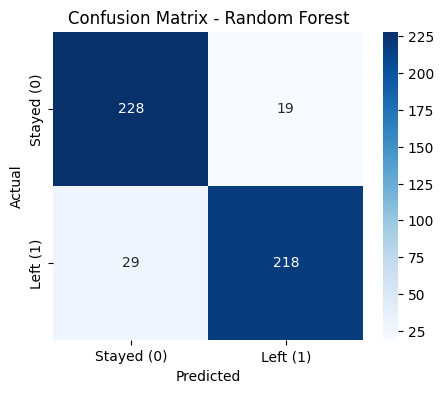

In [369]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [370]:
# True Positives (TP): 22 The model correctly predicted employees who left.
# True Negatives (TN) 350 The model correctly predicted employees who stayed.
# False Positives (FP) 49 The model incorrectly predicted that an employee would leave, but they stayed.
# False Negatives (FN) 20 The model incorrectly predicted that an employee would stay, but they left.

In [371]:
# 5-fold cross-validation
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.92405063 0.9164557  0.88832487 0.92385787 0.89593909]
Mean CV Accuracy: 0.9097256313050183


In [373]:
import os
import pickle

# Save the trained model to file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Random Forest model saved successfully")


Random Forest model saved successfully
